# Doctors' locations

- Each location will be assigned to the number of doctors in this location, thus it will be represented with a histogram.

In [1]:
import json
import collections
import matplotlib.pyplot as plt
from locations import company_provinces
from locations import cairo_cities
from locations import alexandria_cities
from locations import giza_cities
from locations import dakahlia_cities
from locations import sharkia_cities

# Define the path to your JSON file
customers_file_path = 'dataset/customers.json'
companies_file_path = 'dataset/companies.json'

# Open the file and load the contents as a Python object
with open(customers_file_path) as f:
    customers = json.load(f)

with open(companies_file_path) as f:
    companies = json.load(f)

# Now you can access the data just like any other Python object
customers[0]

{'_id': {'$oid': '5d00ebac121aef001570af18'},
 'location': {'country': 'KSA', 'province': 'CENTRAL AREA', 'city': 'RIYADH'},
 'name': 'Jawhara Al Motwa',
 'email': 'Jawhara Al Motwa',
 'phone': 'JawharaAlMotwa',
 'class': 'A',
 'speciality': 'GYN',
 'type': 'Doctor',
 'createdAt': {'$date': '2019-06-12T12:10:20.149Z'},
 'updatedAt': {'$date': '2021-12-20T14:27:32.030Z'},
 '__v': 0,
 'center': 'Sulaiman Al-Habib Hospital - RYN',
 'company_id': {'$oid': '5c990b2b4382f61588e2c0c7'},
 'geolocation': {'long': 25, 'lat': 1}}

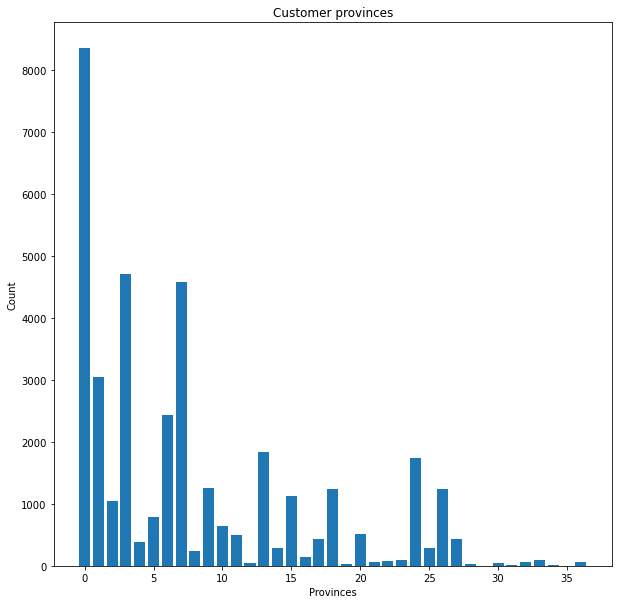

{0: 'CAIRO', 1: 'DAKAHLIA', 2: 'ELMENYA', 3: 'ALEXANDRIA', 4: 'BEHERA', 5: 'KAFR ELSHEIKH', 6: 'SHARKIA', 7: 'GIZA', 8: 'EL MENYA', 9: 'MENOFIA', 10: 'ISMAILIA', 11: 'BANI SUIF', 12: 'ISMAELIA', 13: 'GHARBIA', 14: 'MENOFIYA', 15: 'BEHIRA', 16: 'SUEZ', 17: 'FAYOUM', 18: 'QALYOBIYA', 19: 'DUMIYAT', 20: 'DAMIETTA', 21: 'PORTSAID', 22: 'PORT SAID', 23: 'DELTA', 24: 'SOHAG', 25: 'ASSIUT', 26: 'QENA', 27: 'ASSUIT', 28: 'HURGHADA ', 29: 'NASR CITY', 30: '6TH OCTOBER', 31: 'BANISUIF', 32: 'MATROUH', 33: 'ASWAN', 34: 'HURGHADA', 35: 'RAS GHARIB', 36: 'LUXOR'}


In [2]:
# ========== ----- ========== Provinces Analysis ========== ----- ========== #
# Use a counter to count the number of occurrences of each province
location_counts = collections.Counter(
    customer['location']['province']
    for customer in customers)

all_provinces = list(location_counts.keys())
provinces_to_delete = list(set(all_provinces) - set(company_provinces))

for province_to_delete in provinces_to_delete:
    del location_counts[province_to_delete]

# Create a bar chart of the location counts
provinces_indexes = list(range(len(list(location_counts.keys()))))
provinces_dict = dict(zip(provinces_indexes, location_counts.keys()))
counts = list(location_counts.values())
fig = plt.figure(figsize=(10, 10))
plt.bar(provinces_indexes, counts)

# Add labels and title to the chart
plt.xlabel('Provinces')
plt.ylabel('Count')
plt.title('Customer provinces')

# Display the chart
plt.show()

print(provinces_dict)
# ========== ----- ========== End ========== ----- ========== #

In [8]:
# ========== ----- ========== Cities Analysis ========== ----- ========== #
max_five = sorted(counts)[-5:]
print("Maximum 5 provinces: ", sum(max_five))
print("Total number of doctors: ", sum(counts))
print("Percentage of doctors in maximum 5 provinces to all doctors is ",
      sum(max_five)/sum(counts))

print("\n")

max_indexes = []
max_provinces_values = []
max_provinces = []

for i in range(5):
    index = sorted(range(len(counts)),
                   key=lambda i: counts[i], reverse=True)[i]
    max_indexes.append(index)
    max_provinces_values.append(counts[index])
    max_provinces.append(list(location_counts.keys())[index])

print("Maximum 5 provinces indexes: ", max_indexes)
print("Maximum 5 provinces values: ", max_provinces_values)
print("Maximum 5 provinces: ", max_provinces)
# ========== ----- ========== End ========== ----- ========== #


Maximum 5 provinces:  23124
Total number of doctors:  37858
Percentage of doctors in maximum 5 provinces to all doctors is  0.6108088118759575


Maximum 5 provinces indexes:  [0, 3, 7, 1, 6]
Maximum 5 provinces values:  [8351, 4704, 4583, 3051, 2435]
Maximum 5 provinces:  ['CAIRO', 'ALEXANDRIA', 'GIZA', 'DAKAHLIA', 'SHARKIA']


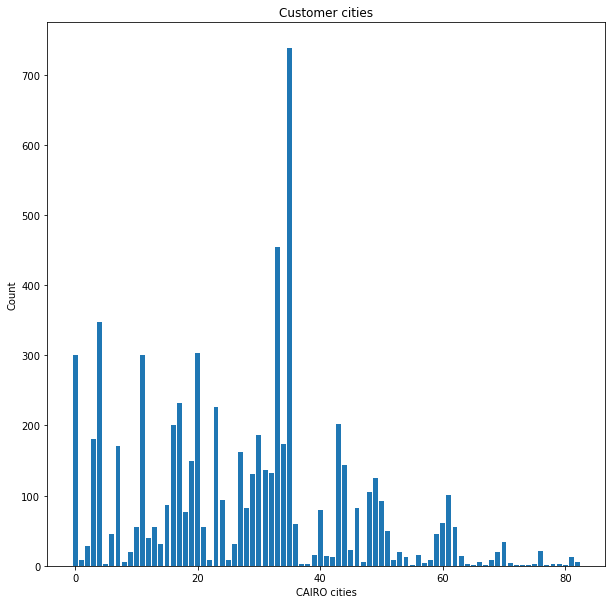

{0: ' AIN SHAMS', 1: 'AMERYA ', 2: 'KASR ELEINI', 3: 'SHOUBRA MASR', 4: ' HELIOPOLIS', 5: ' AL-GEISH ', 6: ' EL-SAYEDA ZENAIB', 7: 'SHOUBRA', 8: 'BAB EL SHEARIA', 9: 'EL ZAWYA', 10: ' MANIAL', 11: '  NASR CITY 1', 12: 'ABBASIA', 13: 'HADAYEK ELKOBA', 14: ' SARAYA ELKOBA', 15: ' DOWN TOWN ', 16: ' MAADI', 17: 'MAADI', 18: ' CAIRO SOUTH 8', 19: ' CAIRO SOUTH 6', 20: ' CAIRO WEST 3', 21: ' MOKATAAM', 22: ' CAIRO SOUTH 4', 23: ' CAIRO CENTER', 24: ' HELWAN ', 25: ' EL WAILY ', 26: 'CAIRO WEST 5 ', 27: ' MAADI 1', 28: ' ZAYTON', 29: 'HELWAN', 30: ' HELWAN 1', 31: ' MAADI 2', 32: ' HELWAN 2', 33: ' CAIRO EAST 4', 34: ' NASR CITY 2', 35: 'HELIOPOLIS 1', 36: 'HELIOPOLIS 4', 37: 'EL DAHER ', 38: 'MOKATTAM', 39: ' EL MARG', 40: 'EL KOUBAH', 41: ' SHOUBRA MISR', 42: ' CAIRO SOUTH 7', 43: ' CAIRO EAST 5', 44: ' CAIRO EAST 6', 45: ' IMBABA 2', 46: ' CAIRO EAST 1', 47: ' MOKATTAM', 48: ' NASR CITY', 49: ' CAIRO EAST 2', 50: ' CAIRO SOUTH 5', 51: ' CAIRO SOUTH', 52: 'DAR EL SALAM ', 53: 'CAIRO WEST 6

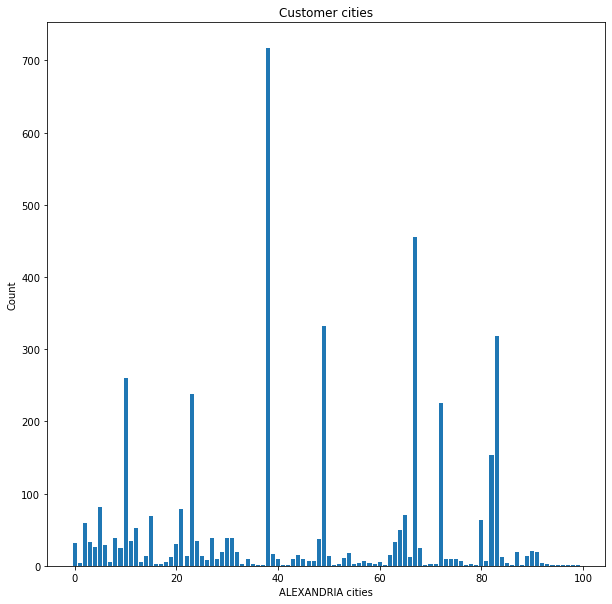

{0: 'CLEOPATRA', 1: 'WARDIAN', 2: ' SMOUHA', 3: 'MIAMI', 4: 'EL-ASAFRA', 5: 'ASAFRA', 6: 'VICTORIA', 7: 'FLEMING', 8: 'SPORTING', 9: 'AL HADRA ', 10: 'EAST ALEX3', 11: 'ROSHDY ', 12: 'MOHRRAM BEK', 13: 'CAMP SHIZAR ', 14: 'SABA BASHA', 15: ' IBRAHIMIA ', 16: 'RAML STATION', 17: 'GLEEM', 18: 'ROSHDY', 19: ' SIDI GABER ', 20: 'IBRAHIMIA', 21: 'ABOU QEER', 22: 'RAS ELTEEN ', 23: 'EAST ALEX1', 24: 'SIDI BESHR ', 25: 'SEDI-BESHR', 26: 'SHATBY ', 27: 'SMOUHA', 28: 'KABBARY ', 29: 'GLEEM ', 30: 'RAMEL STATION ', 31: 'MIAMI ', 32: 'BAKKOUS ', 33: 'TOSSON', 34: 'MANDARA', 35: 'EL-SYOF', 36: 'SOMOUHA', 37: 'BAB SHARQ ', 38: 'ALEX CENTER1', 39: 'AGAMI', 40: 'BAKOUS', 41: 'ABU ELDERDAR ', 42: 'LORAN', 43: ' MOSTAFA KAMEL', 44: ' FLEMING', 45: 'AZARITA ', 46: 'KHORSHID', 47: ' BOUKLA ', 48: 'VICTORIA ', 49: 'EAST ALEX4', 50: 'SIDI GABER', 51: 'EL-MANDRA', 52: 'AZARITA', 53: 'WENGAT', 54: 'ABU QIR ', 55: 'ZAWAIDA ', 56: 'MAAMOURA ', 57: 'JANAKLIS', 58: 'ELSYOF ', 59: 'KHORSHID ', 60: 'AWAID ', 61: '

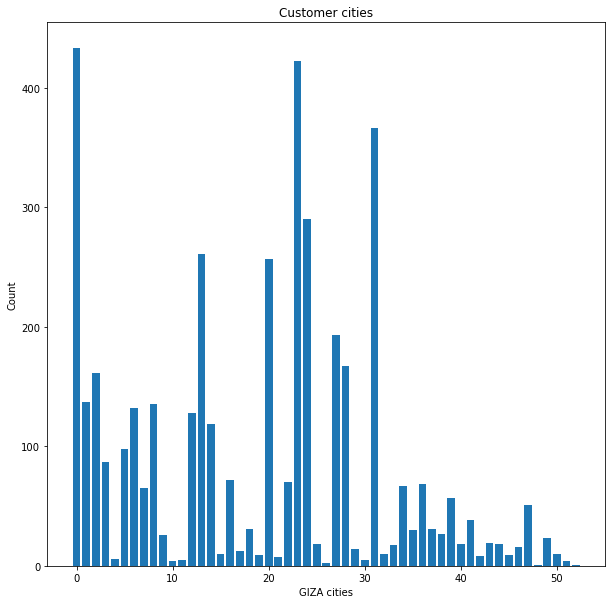

{0: 'NASR CITY', 1: 'HARAM3', 2: 'HARAM2', 3: 'SHEIKH ZAYED', 4: 'NAHIA', 5: 'GIZA3', 6: 'MOHANDESIN ', 7: 'DOKKI', 8: ' DOKKI ', 9: 'HAWAMDIA', 10: 'AGOUZA', 11: 'NAHIA ', 12: 'HARAM ', 13: 'FAISAL', 14: 'OCTOBER  ', 15: 'ZAMALEK', 16: 'BADRASHIN', 17: 'HADAYEK EL AHRAM ', 18: ' IMBABA ', 19: 'AGOUZA ', 20: 'HARAM1 ', 21: 'OCTOBER', 22: 'GIZA SQUARE', 23: 'FAISAL1', 24: 'GIZA12', 25: 'MONIB', 26: ' ARD EL LEWA', 27: 'IMBABA2', 28: 'IMBABA1', 29: 'IMBABA', 30: ' MONIB ', 31: 'GIZA8', 32: ' EL BADRASHIN', 33: 'AYAT', 34: 'GIZA5', 35: 'IMBABA3', 36: 'GIZA4', 37: 'MOHANDESSIN', 38: ' BRICK1 GUIZA II', 39: 'GIZA1', 40: ' BRICK2 GUIZAI', 41: 'HWAMDIA', 42: ' BRICK3 GUIZAII', 43: 'GIZA7', 44: 'GIZA6', 45: 'GIZA2', 46: 'ELNOMROS', 47: 'GIZA11', 48: 'MANWAT', 49: 'GIZA9', 50: 'GIZA10', 51: 'DAHSHOUR', 52: 'ABOU EL NOMROS'}


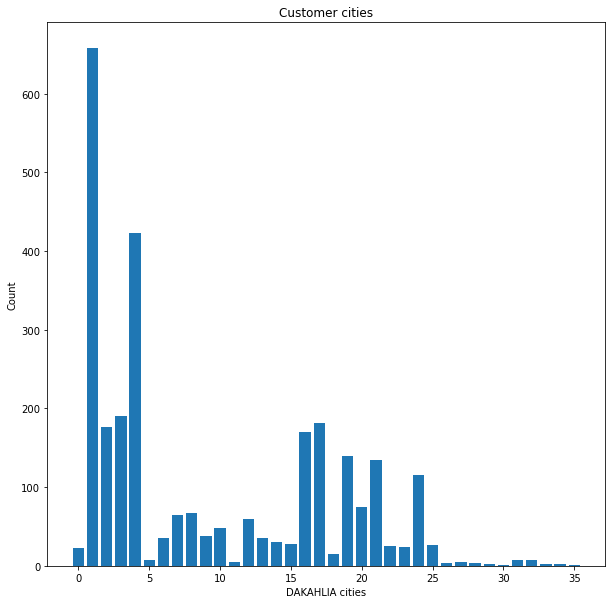

{0: 'MENYET ELNASR', 1: 'DAKAHLIA1', 2: 'DAKAHLIA6', 3: 'DAKAHLIA2', 4: 'MANSOURA', 5: ' GAMALIA ', 6: 'MANZLA ', 7: 'BELKAS', 8: 'SHERBIN ', 9: ' AGA', 10: 'SINBELLAWIN', 11: 'DEKERNES', 12: 'MIT GHAMR ', 13: 'DEKRENS ', 14: ' TALKHA ', 15: 'MINYT ELNASR ', 16: 'DAKAHLIA7', 17: 'DAKAHLIA9', 18: 'EL-MANZALAH', 19: 'DAKAHLIA10', 20: 'DAKAHLIA4', 21: 'DAKAHLIA5', 22: 'ELSINBLAWIN', 23: 'SHIRBIN', 24: 'DAKAHLIA8', 25: 'DIKIRNIS', 26: ' MENYT EL NASR', 27: ' MANZALA', 28: 'MEET SALSIL', 29: 'BANI EBEID', 30: 'MEET NAHAL', 31: 'MATARYA', 32: 'GAMALYA', 33: 'KORDY', 34: 'REYAD', 35: 'DEMSHALT'}


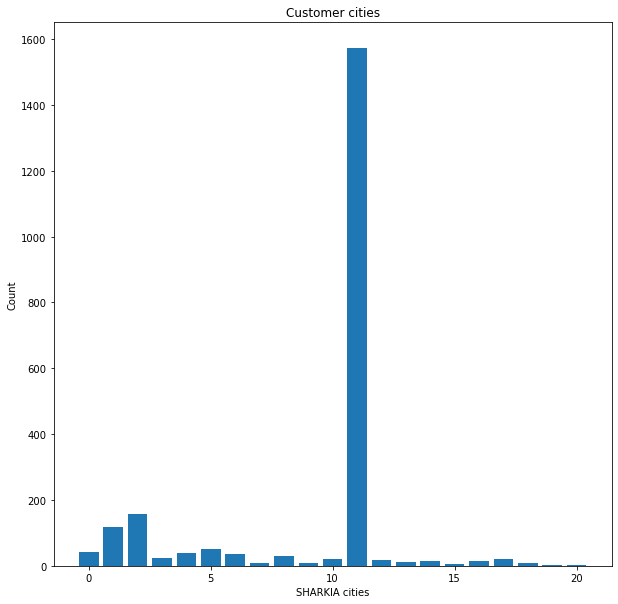

{0: 'FAKOUS ', 1: ' 10TH OF RAMDAN', 2: 'ZAGAZIG ', 3: ' ABU KEBIR', 4: 'BELBIS', 5: 'MINYA ELQAMAH', 6: ' ABU HAMAD', 7: ' AWALD SAKR', 8: ' KAFR SAKR', 9: 'MASHTOL ', 10: 'DYRB NEGM ', 11: 'SHARKIA 1', 12: 'ABO HMAD ', 13: 'BILBEIS ', 14: 'MASHTOUL', 15: 'DYARB NEGM', 16: ' TENTH OF RAMADAN CITY', 17: ' MENIA EL-KAMH ', 18: 'SUEZ/SOUTH SINAI 1', 19: 'ELSADIYAN ', 20: 'ABO HMMAD '}


In [19]:
# ========== ----- ========== Cities Analysis ========== ----- ========== #
# Use a counter to count the number of occurrences of each citiy

max_provinces = [cairo_cities, alexandria_cities,
                 giza_cities, dakahlia_cities, sharkia_cities]
titles = ["CAIRO cities", "ALEXANDRIA cities",
          "GIZA cities", "DAKAHLIA cities", "SHARKIA cities"]

for max_province, title in zip(max_provinces, titles):
    location_counts = collections.Counter(
        customer['location']['city']
        for customer in customers)

    all_cities = list(location_counts.keys())
    cities_to_delete = list(set(all_cities) - set(max_province))

    for citie_to_delete in cities_to_delete:
        del location_counts[citie_to_delete]

    # Create a bar chart of the location counts
    cities_indexes = list(range(len(list(location_counts.keys()))))
    cities_dict = dict(zip(cities_indexes, location_counts.keys()))
    counts = list(location_counts.values())
    fig = plt.figure(figsize=(10, 10))
    plt.bar(cities_indexes, counts)

    # Add labels and title to the chart
    plt.xlabel(title)
    plt.ylabel('Count')
    plt.title('Customer cities')

    # Display the chart
    plt.show()

    print(cities_dict)
# ========== ----- ========== End ========== ----- ========== #
